# 1. Elon_Musk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [3]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [4]:
from nltk.corpus import stopwords

In [5]:
pip install -U textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
from textblob import TextBlob

In [7]:
#Read Data
data = pd.read_csv('Elon_musk.csv',encoding="latin-1")
data.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 Im an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [8]:
#Number of Words in single tweet
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()

Text  word_count
0                             @kunalb11 Im an alien           4
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...          13
2                @joerogan @Spotify Great interview!           4
3                    @gtera27 Doge is underestimated           4
4  @teslacn Congratulations Tesla China for amazi...          17

In [9]:
#Number of characters in single tweet
data['char_count'] = data['Text'].str.len() ## this also includes spaces
data[['Text','char_count']].head()

Text  char_count
0                             @kunalb11 Im an alien          22
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...          82
2                @joerogan @Spotify Great interview!          35
3                    @gtera27 Doge is underestimated          31
4  @teslacn Congratulations Tesla China for amazi...         104

In [10]:
#Average Word Length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
data[['Text','avg_word']].head()

Text  avg_word
0                             @kunalb11 Im an alien  4.750000
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...  5.384615
2                @joerogan @Spotify Great interview!  8.000000
3                    @gtera27 Doge is underestimated  7.000000
4  @teslacn Congratulations Tesla China for amazi...  5.176471

In [11]:
#Number of stopwords
stop = stopwords.words('english')

data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head()

Text  stopwords
0                             @kunalb11 Im an alien          1
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...          4
2                @joerogan @Spotify Great interview!          0
3                    @gtera27 Doge is underestimated          1
4  @teslacn Congratulations Tesla China for amazi...          5

In [12]:
#Number of Special Characters
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head()

Text  hastags
0                             @kunalb11 Im an alien        1
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...        1
2                @joerogan @Spotify Great interview!        2
3                    @gtera27 Doge is underestimated        1
4  @teslacn Congratulations Tesla China for amazi...        1

In [13]:
#Number of Numerics
data['numerics'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Text','numerics']].head()

Text  numerics
0                             @kunalb11 Im an alien         0
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...         0
2                @joerogan @Spotify Great interview!         0
3                    @gtera27 Doge is underestimated         0
4  @teslacn Congratulations Tesla China for amazi...         0

In [14]:
#Number of Upper Case Words
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Text','upper']].head()

Text  upper
0                             @kunalb11 Im an alien      0
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...      1
2                @joerogan @Spotify Great interview!      0
3                    @gtera27 Doge is underestimated      0
4  @teslacn Congratulations Tesla China for amazi...      0

### Pre-Processing


In [15]:
#Lower Case
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [16]:
#Removing Punctuations
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()

C:\Users\Pushpalatha\AppData\Local\Temp\ipykernel_17576\2770111704.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

In [17]:
#Removal of Stop Words
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

In [18]:
#Common word removal
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [19]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [20]:
#Rare Words Removal
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq

nyquil                1
musk                  1
negati                1
httpstco6ohta09s5l    1
carousel              1
joeingeneral          1
andrewbogut           1
typical               1
unusual               1
altho                 1
dtype: int64

In [21]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [22]:
#Spelling correction
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [23]:
#Tokenization
nltk.download('punkt')
TextBlob(data['Text'][1]).words

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

In [24]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [25]:
#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

In [26]:
#Lemmatization
from textblob import Word
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [27]:
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

### Advanced Text Processing

In [28]:
#N-grams
TextBlob(data['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'im']), WordList(['im', 'alien'])]

In [29]:
#Term frequency
tf1 = (data['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

words  tf
0  id_aa_carmack   1
1            ray   1
2        tracing   1
3      cyberpunk   1
4            hdr   1
5      nextlevel   1
6          tried   1

In [30]:
# Inverse Document Frequencyfor i,word in enumerate(tf1['words']):
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(word)])))

tf1

words  tf       idf
0  id_aa_carmack   1  4.166415
1            ray   1  5.035453
2        tracing   1  7.600402
3      cyberpunk   1  5.115496
4            hdr   1  6.907255
5      nextlevel   1  6.907255
6          tried   1  5.808643

In [31]:
#Term Frequency – Inverse Document Frequency (TF-IDF)
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

words  tf       idf     tfidf
0  id_aa_carmack   1  4.166415  4.166415
1            ray   1  5.035453  5.035453
2        tracing   1  7.600402  7.600402
3      cyberpunk   1  5.115496  5.115496
4            hdr   1  6.907255  6.907255
5      nextlevel   1  6.907255  6.907255
6          tried   1  5.808643  5.808643

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(data['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7374 stored elements in Compressed Sparse Row format>

In [33]:
#Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Text'])
data_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 8020 stored elements in Compressed Sparse Row format>

In [34]:
#Sentiment Analysis
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [35]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head()

Text  sentiment
0                                  kunalb11 im alien      -0.25
1  id_aa_carmack ray tracing cyberpunk hdr nextle...       0.00
2                         joerogan spotify interview       0.00
3                        gtera27 doge underestimated       0.00
4  teslacn congratulation china amazing execution...       0.20

### Perform emotion mining

In [36]:
! pip install future

Defaulting to user installation because normal site-packages is not writeable


In [37]:
pip install -U future 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
import codecs
import re
import copy
import collections
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer

import matplotlib
%matplotlib inline

In [39]:
from __future__ import division
import os
from nltk.corpus import twitter_samples

In [40]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [41]:
from nltk.corpus import stopwords

In [42]:
with codecs.open("positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [43]:
with codecs.open("negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [44]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [45]:
from nltk.corpus import twitter_samples
nltk.download('twitter_samples')

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

[nltk_data] Error loading twitter_samples: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


In [46]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [47]:
from nltk.corpus import twitter_samples
nltk.download('twitter_samples')

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

[nltk_data] Error loading twitter_samples: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


In [48]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

print(tweet_tokens[0])

#FollowFriday


# 2. Amazon web scraping emotion mining

In [49]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [50]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [51]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [52]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [53]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [54]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\Pushpalatha\AppData\Local\Temp\ipykernel_17576\965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [55]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

Rating                                    Title  \
0        4.0              My Review on OnePlus Mobile   
1        4.0      Good phone-could have been better !   
2        4.0                   A mildly perfect phone   
3        4.0         This is a branded budget phone 📱   
4        4.0                    Going great...for now   
...      ...                                      ...   
4995     5.0            Awesome  mobile in this price   
4996     3.0                      Kuch khas nahi laga   
4997     2.0                              Performance   
4998     4.0                                 Naild it   
4999     5.0  Superb mobile in under 20000 on oneplus   

                                                 Review       Review_Date  
0     My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  28 December 2022  
1     I've purchased the 6GB version of this phone w...  19 December 2022  
2     I will try to keep this review short. This rev...   12 January 2023  
3     This is definitely a budget branded phone 📱 af...    5 January 2023  
4     I received it today. The quality is good. It's...   11 January 2023  
...                                                 ...               ...  
4995  In this price range this phone is awesome all ...      29 July 2022  
4996                         Bekar camera, bahut bhari,      31 July 2022  
4997                    Phone performance is very poor.  13 November 2022  
4998                                        Nice mobile     26 April 2022  
4999                                                       31 August 2022  

[5000 rows x 4 columns]

In [56]:
df.to_csv("C:/Users/Pushpalatha/Desktop/Assignments/Text_mining/Amazon_Reviews.csv")

In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook


In [58]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [59]:
# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [61]:
# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

In [62]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

In [63]:
# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [64]:
# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>
[nltk_data] Error loading averaged_perceptron_t

In [65]:
# for showing all the plots inline
%matplotlib inline

In [66]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Rating                                    Title  \
0        4.0              My Review on OnePlus Mobile   
1        4.0      Good phone-could have been better !   
2        4.0                   A mildly perfect phone   
3        4.0         This is a branded budget phone 📱   
4        4.0                    Going great...for now   
...      ...                                      ...   
4995     5.0            Awesome  mobile in this price   
4996     3.0                      Kuch khas nahi laga   
4997     2.0                              Performance   
4998     4.0                                 Naild it   
4999     5.0  Superb mobile in under 20000 on oneplus   

                                                 Review       Review_Date  
0     My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  28 December 2022  
1     I've purchased the 6GB version of this phone w...  19 December 2022  
2     I will try to keep this review short. This rev...   12 January 2023  
3     This is definitely a budget branded phone 📱 af...    5 January 2023  
4     I received it today. The quality is good. It's...   11 January 2023  
...                                                 ...               ...  
4995  In this price range this phone is awesome all ...      29 July 2022  
4996                         Bekar camera, bahut bhari,      31 July 2022  
4997                    Phone performance is very poor.  13 November 2022  
4998                                        Nice mobile     26 April 2022  
4999                                                NaN    31 August 2022  

[5000 rows x 4 columns]

In [67]:
reviews.Rating.describe()

count    5000.000000
mean        4.247400
std         0.763616
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [68]:
#Number of Words
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

Review  word_count
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...         432
1  I've purchased the 6GB version of this phone w...         299
2  I will try to keep this review short. This rev...         216
3  This is definitely a budget branded phone 📱 af...         152
4  I received it today. The quality is good. It's...         119

In [69]:
#Number of characters
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

Review  char_count
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...      2530.0
1  I've purchased the 6GB version of this phone w...      1715.0
2  I will try to keep this review short. This rev...      1189.0
3  This is definitely a budget branded phone 📱 af...       807.0
4  I received it today. The quality is good. It's...       692.0

In [70]:
#Average Word Length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

Review  avg_word
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  4.858796
1  I've purchased the 6GB version of this phone w...  4.755034
2  I will try to keep this review short. This rev...  4.509259
3  This is definitely a budget branded phone 📱 af...  4.344371
4  I received it today. The quality is good. It's...  4.823529

In [71]:
#Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

Review  stopwords
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...        178
1  I've purchased the 6GB version of this phone w...        128
2  I will try to keep this review short. This rev...         94
3  This is definitely a budget branded phone 📱 af...         53
4  I received it today. The quality is good. It's...         41

In [72]:
#Number of special characters
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

Review  hashtags
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...         0
1  I've purchased the 6GB version of this phone w...         0
2  I will try to keep this review short. This rev...         0
3  This is definitely a budget branded phone 📱 af...         0
4  I received it today. The quality is good. It's...         0

In [73]:
#Number of numerics
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

Review  numerics
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...         1
1  I've purchased the 6GB version of this phone w...         2
2  I will try to keep this review short. This rev...         0
3  This is definitely a budget branded phone 📱 af...         7
4  I received it today. The quality is good. It's...         0

In [74]:
#Number of Uppercase words
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

Review  upper
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...     20
1  I've purchased the 6GB version of this phone w...      4
2  I will try to keep this review short. This rev...      3
3  This is definitely a budget branded phone 📱 af...      3
4  I received it today. The quality is good. It's...      2

In [75]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [76]:
#Spelling correction
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    By POVs for ONE Plus Word CE2 Site Shone.A.Gro...
1    I've purchased the 6GB version of this phone w...
2    I will try to keep this review short. His revi...
3    His is definitely a budget branded phone 📱 aft...
4    I received it today. The quality is good. It's...
Name: Review, dtype: object

### Feature Engineering

In [77]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       28
1       19
2       12
3        5
4       11
        ..
4995    29
4996    31
4997    13
4998    26
4999    31
Name: Review_Date, Length: 5000, dtype: object 
 0       December
1       December
2        January
3        January
4        January
          ...   
4995        July
4996        July
4997    November
4998       April
4999      August
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2022
2       2023
3       2023
4       2023
        ... 
4995    2022
4996    2022
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


In [78]:
#Spliting Review Date into Three seperate Columns (Year,Month,Day)
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

Date     Month  Year
0      28  December  2022
1      19  December  2022
2      12   January  2023
3       5   January  2023
4      11   January  2023
...   ...       ...   ...
4995   29      July  2022
4996   31      July  2022
4997   13  November  2022
4998   26     April  2022
4999   31    August  2022

[5000 rows x 3 columns]

In [79]:
df.Month.value_counts()

in           2340
October       472
September     416
November      366
August        329
December      233
July          211
June          195
May           153
January       146
April          77
March          51
February       11
Name: Month, dtype: int64

In [80]:
#Change 'month' from words to numbers for easier analysis
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

Month
0     December
1     December
2      January
3      January
4      January
...        ...
4995      July
4996      July
4997  November
4998         4
4999    August

[5000 rows x 1 columns]

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4760 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   hashtags     5000 non-null   int64  
 5   Date         5000 non-null   object 
 6   Month        5000 non-null   object 
 7   Year         5000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 312.6+ KB


In [82]:
df1[['Date','Year']]=df1[['Date','Year']].astype('object')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4760 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   hashtags     5000 non-null   int64  
 5   Date         5000 non-null   object 
 6   Month        5000 non-null   object 
 7   Year         5000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 312.6+ KB


In [83]:
#Dropping the Original Columns after splitting the data
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

Rating                                Title  \
0     4.0          My Review on OnePlus Mobile   
1     4.0  Good phone-could have been better !   
2     4.0               A mildly perfect phone   
3     4.0     This is a branded budget phone 📱   
4     4.0                Going great...for now   

                                              Review  hashtags Date     Month  \
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...         0   28  December   
1  I've purchased the 6GB version of this phone w...         0   19  December   
2  I will try to keep this review short. This rev...         0   12   January   
3  This is definitely a budget branded phone 📱 af...         0    5   January   
4  I received it today. The quality is good. It's...         0   11   January   

   Year  
0  2022  
1  2022  
2  2023  
3  2023  
4  2023

In [84]:
df

Rating                                    Title  \
0        4.0              My Review on OnePlus Mobile   
1        4.0      Good phone-could have been better !   
2        4.0                   A mildly perfect phone   
3        4.0         This is a branded budget phone 📱   
4        4.0                    Going great...for now   
...      ...                                      ...   
4995     5.0            Awesome  mobile in this price   
4996     3.0                      Kuch khas nahi laga   
4997     2.0                              Performance   
4998     4.0                                 Naild it   
4999     5.0  Superb mobile in under 20000 on oneplus   

                                                 Review       Review_Date  \
0     My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  28 December 2022   
1     I've purchased the 6GB version of this phone w...  19 December 2022   
2     I will try to keep this review short. This rev...   12 January 2023   
3     This is definitely a budget branded phone 📱 af...    5 January 2023   
4     I received it today. The quality is good. It's...   11 January 2023   
...                                                 ...               ...   
4995  In this price range this phone is awesome all ...      29 July 2022   
4996                         Bekar camera, bahut bhari,      31 July 2022   
4997                    Phone performance is very poor.  13 November 2022   
4998                                        Nice mobile     26 April 2022   
4999                                                NaN    31 August 2022   

      hashtags Date     Month  Year  
0            0   28  December  2022  
1            0   19  December  2022  
2            0   12   January  2023  
3            0    5   January  2023  
4            0   11   January  2023  
...        ...  ...       ...   ...  
4995         0   29      July  2022  
4996         0   31      July  2022  
4997         0   13  November  2022  
4998         0   26     April  2022  
4999         0   31    August  2022  

[5000 rows x 8 columns]

### Basic Text Processing

In [85]:
data = df[['Review']]
data

Review
0     My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...
1     I've purchased the 6GB version of this phone w...
2     I will try to keep this review short. This rev...
3     This is definitely a budget branded phone 📱 af...
4     I received it today. The quality is good. It's...
...                                                 ...
4995  In this price range this phone is awesome all ...
4996                         Bekar camera, bahut bhari,
4997                    Phone performance is very poor.
4998                                        Nice mobile
4999                                                NaN

[5000 rows x 1 columns]

In [86]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [87]:
data

Review
0     my povs one plus nord ce2 lite phone.a.pros---...
1     i've purchased 6gb version phone comes extenda...
2     i try keep review short. this review perspecti...
3     this definitely budget branded phone 📱 1 month...
4     i received today. the quality good. it's apt g...
...                                                 ...
4995  in price range phone awesome good like batery ...
4996                         bekar camera, bahut bhari,
4997                            phone performance poor.
4998                                        nice mobile
4999                                                nan

[5000 rows x 1 columns]

In [88]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [89]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...

#### Text Pre-processing Techniques

In [90]:
#Removing names
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [91]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [92]:
#removing links
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [93]:
#removing reviews with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [94]:
#dropping duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [95]:
#resetting index
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [96]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [97]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [98]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [99]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [100]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  \
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...   
1  I've purchased the 6GB version of this phone w...   
2  I will try to keep this review short. This rev...   
3  This is definitely a budget branded phone 📱 af...   
4  I received it today. The quality is good. It's...   
5  Everything is perfect trust me just the front ...   
6  Dual application features is not available, ap...   
7  Overall good phone with average camera quality...   
8  Overall a good 5G phoneBattery- A good battery...   
9                      Very good product under price   

                                    tokenized_tweets  
0  [povs, one, plus, nord, ce, lite, phone, pro, ...  
1  [purchased, gb, version, phone, come, extendab...  
2  [try, keep, review, short, review, perspective...  
3  [definitely, budget, branded, phone, month, da...  
4  [received, today, quality, good, apt, gamers, ...  
5  [everything, perfect, trust, front, camera, li...  
6  [dual, application, feature, available, app, c...  
7  [overall, good, phone, average, camera, qualit...  
8  [overall, good, g, phonebattery, good, battery...  
9                             [good, product, price]

In [101]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [102]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [103]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  \
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...   
1  I've purchased the 6GB version of this phone w...   
2  I will try to keep this review short. This rev...   
3  This is definitely a budget branded phone 📱 af...   
4  I received it today. The quality is good. It's...   
5  Everything is perfect trust me just the front ...   
6  Dual application features is not available, ap...   
7  Overall good phone with average camera quality...   
8  Overall a good 5G phoneBattery- A good battery...   
9                      Very good product under price   

                                    tokenized_tweets  
0  [povs, one, plus, nord, ce, lite, phone, pro, ...  
1  [purchased, gb, version, phone, come, extendab...  
2  [try, keep, review, short, review, perspective...  
3  [definitely, budget, branded, phone, month, da...  
4  [received, today, quality, good, apt, gamers, ...  
5  [everything, perfect, trust, front, camera, li...  
6  [dual, application, feature, available, app, c...  
7  [overall, good, phone, average, camera, qualit...  
8  [overall, good, g, phonebattery, good, battery...  
9                             [good, product, price]

In [104]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['purchased', 'gb', 'version', 'phone', 'come', 'extendable', 'gb', 'ram', 'virtual', 'memory', 'capability', 'good', 'phone', 'least', 'expensive', 'category', 'offering', 'one', 'plus', 'small', 'evident', 'point', 'get', 'noticed', 'first', 'thing', 'confusing', 'placement', 'power', 'button', 'hence', 'finger', 'sensor', 'daily', 'handling', 'mobile', 'phone', 'feel', 'bit', 'annoying', 'finger', 'locking', 'un', 'locking', 'phone', 'try', 'handle', 'place', 'pocket', 'although', 'big', 'problem', 'still', 'something', 'think', 'second', 'point', 'lag', 'noticeable', 'bit', 'hoping', 'might', 'go', 'away', 'update', 'improvement', 'third', 'point', 'speaker', 'volume', 'speaker', 'good', 'near', 'maximum', 'level', 'e', 'volume', 'seem', 'creep', 'steadily', 'rather', 'louds', 'top', 'volume', 'limit', 'fourth', 'point', 'final', 'one', 'camera', 'shoot', 'color', 'realistic', 'photo', 'taken', 'day', 'light', 'especially', 'skin', 'tone', 'tend', 'coloured', 'led', 'flash

In [105]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [povs, one, plus, nord, ce, lite, phone, pro, ...
1    [purchased, gb, version, phone, come, extendab...
2    [try, keep, review, short, review, perspective...
3    [definitely, budget, branded, phone, month, da...
4    [received, today, quality, good, apt, gamers, ...
5    [everything, perfect, trust, front, camera, li...
6    [dual, application, feature, available, app, c...
7    [overall, good, phone, average, camera, qualit...
8    [overall, good, g, phonebattery, good, battery...
9                               [good, product, price]
Name: Clean_Reviews, dtype: object

In [106]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [107]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

stemmed
0     pov one plus nord ce lite phone pro use oneplu...
1     purchas gb version phone come extend gb ram vi...
2     tri keep review short review perspect averag u...
3     definit budget brand phone month day use today...
4     receiv today qualiti good apt gamer video watc...
...                                                 ...
4943  price rang phone awesom good like bateri charg...
4944                           bekar camera bahut bhari
4945                                 phone perform poor
4946                                         nice mobil
4947                                                nan

[4948 rows x 1 columns]

In [108]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


stemmed
0     povs one plus nord ce lite phone pro using one...
1     purchased gb version phone come extendable gb ...
2     try keep review short review perspective avera...
3     definitely budget branded phone month day use ...
4     received today quality good apt gamers video w...
...                                                 ...
4943  price range phone awesome good like batery cha...
4944                           bekar camera bahut bhari
4945                             phone performance poor
4946                                        nice mobile
4947                                                nan

[4948 rows x 1 columns]

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [110]:
#print(cv.vocabulary_)
print(cv.get_feature_names()[109:200])

['ah', 'ahead', 'aheadof', 'ai', 'aince', 'airtel', 'ak', 'aknh', 'al', 'alart', 'albeit', 'alert', 'alexa', 'alignment', 'alike', 'allover', 'allow', 'allram', 'allready', 'allright', 'allround', 'allrounder', 'almost', 'alone', 'along', 'alot', 'already', 'alril', 'also', 'alsothe', 'alspath', 'alternate', 'alternative', 'although', 'altogether', 'always', 'alwayspurchased', 'amaging', 'amaze', 'amazed', 'amazing', 'amazingly', 'amazon', 'amazone', 'amazonit', 'ambient', 'amd', 'amezing', 'amezon', 'amh', 'amloiedover', 'ammolated', 'amo', 'amoled', 'amolid', 'among', 'amount', 'ample', 'amzon', 'anazing', 'andar', 'andbcamera', 'andfinger', 'andif', 'andorid', 'android', 'androidbattery', 'angel', 'angle', 'angry', 'animation', 'announce', 'announces', 'annoying', 'anoriod', 'another', 'answer', 'answering', 'antutu', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'anywehe', 'anywhere', 'aod', 'ap', 'apart']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [111]:
print(cv.get_feature_names()[:100])

['aa', 'aacha', 'aaj', 'aap', 'aapko', 'aaplog', 'aati', 'aayega', 'ab', 'abhi', 'able', 'abnd', 'abnormal', 'absence', 'absent', 'absolutely', 'absolutelybut', 'absolutelynot', 'absurd', 'abt', 'acalso', 'accept', 'acceptable', 'acceptablecamera', 'accepted', 'accepts', 'access', 'accessible', 'accessing', 'accessory', 'accha', 'accidental', 'accommodated', 'accomodate', 'accomplished', 'according', 'accordingbrand', 'account', 'accurate', 'acha', 'achcha', 'achchha', 'achchhi', 'achha', 'achhe', 'achhi', 'achi', 'achievable', 'achieve', 'achieved', 'across', 'act', 'activate', 'activated', 'activates', 'activity', 'actual', 'actually', 'ad', 'adamant', 'adapter', 'adaption', 'adaptive', 'adaptor', 'add', 'added', 'addict', 'addicted', 'adding', 'addition', 'additional', 'address', 'adepter', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'admit', 'adopted', 'adopter', 'adoptor', 'advance', 'advanced', 'advantage', 'adventurous', 'advertised', 'advertising', 'advice', 'advise', 'aes

In [112]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [113]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4948 [00:00<?, ?it/s]

In [114]:
corpus[3]

'definit budget brand phone month day use today post review got phone children day gift father pro heavi user charg stay hour otherwis stay almost day smooth touch issu type anyth camera qualiti awesom show origin skin textur audio qualiti also awesom video qualiti wow g enabl clean uicon filter lover like origin skin textur phone phone p resolut limit g band hdr support netflix amazon prime mean view experi alway lag behind'

In [115]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [116]:
X.shape

(4948, 5000)

In [117]:
cv.get_feature_names()[:20]

['aacha',
 'aap',
 'ab',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'acha hai',
 'achha',
 'achi',
 'achiev',
 'activ',
 'actual',
 'ad']

In [118]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [119]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

aacha  aap  ab  abl  absolut  accept  access  accessori  accha  accord  \
0         0    0   0    0        0       0       0          0      0       0   
1         0    0   0    0        0       0       0          0      0       0   
2         0    0   0    0        0       0       0          0      0       0   
3         0    0   0    0        0       0       0          0      0       0   
4         0    0   0    0        0       0       0          0      0       0   
...     ...  ...  ..  ...      ...     ...     ...        ...    ...     ...   
4943      0    0   0    0        0       0       0          0      0       0   
4944      0    0   0    0        0       0       0          0      0       0   
4945      0    0   0    0        0       0       0          0      0       0   
4946      0    0   0    0        0       0       0          0      0       0   
4947      0    0   0    0        0       0       0          0      0       0   

      ...  year secur  year secur updat  yellow  yesterday  yet  youtub  \
0     ...           0                 0       0          0    0       0   
1     ...           0                 0       0          0    0       0   
2     ...           0                 0       0          0    0       1   
3     ...           0                 0       0          0    0       0   
4     ...           0                 0       0          0    0       0   
...   ...         ...               ...     ...        ...  ...     ...   
4943  ...           0                 0       0          0    0       0   
4944  ...           0                 0       0          0    0       0   
4945  ...           0                 0       0          0    0       0   
4946  ...           0                 0       0          0    0       0   
4947  ...           0                 0       0          0    0       0   

      youtub video  yr  zero  zoom  
0                0   0     0     0  
1                0   0     0     0  
2                0   0     0     0  
3                0   0     0     0  
4                0   0     0     0  
...            ...  ..   ...   ...  
4943             0   0     0     0  
4944             0   0     0     0  
4945             0   0     0     0  
4946             0   0     0     0  
4947             0   0     0     0  

[4948 rows x 5000 columns]

In [120]:
#TF_IDF Vectorizer
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4948 [00:00<?, ?it/s]

In [121]:
corpus[4]

'receiv today qualiti good apt gamer video watcher expand gb intern ram make chang basic set becom le technic usag friendli like keypad batteri drain fast charger fast adapt gigant travel would need extra space adjust sim tray extern memori sim option could prove challeng bluetooth sound wireless samsung neck band great sound vibrat take video call lower avoid spoil speaker comfort carri workout phone came transpar cover'

In [122]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [123]:
X.shape

(4948, 5000)

In [124]:
tfidf_v.get_feature_names()[:20]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aacha',
 'aap',
 'ab',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'acha hai',
 'achha',
 'achi',
 'achiev',
 'activ',
 'actual',
 'ad']

In [125]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [126]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

aacha  aap   ab  abl  absolut  accept  access  accessori  accha  accord  \
0       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
1       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
2       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
3       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
...     ...  ...  ...  ...      ...     ...     ...        ...    ...     ...   
4943    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4944    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4945    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4946    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4947    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   

      ...  year secur  year secur updat  yellow  yesterday  yet    youtub  \
0     ...         0.0               0.0     0.0        0.0  0.0  0.000000   
1     ...         0.0               0.0     0.0        0.0  0.0  0.000000   
2     ...         0.0               0.0     0.0        0.0  0.0  0.076845   
3     ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4     ...         0.0               0.0     0.0        0.0  0.0  0.000000   
...   ...         ...               ...     ...        ...  ...       ...   
4943  ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4944  ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4945  ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4946  ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4947  ...         0.0               0.0     0.0        0.0  0.0  0.000000   

      youtub video   yr  zero  zoom  
0              0.0  0.0   0.0   0.0  
1              0.0  0.0   0.0   0.0  
2              0.0  0.0   0.0   0.0  
3              0.0  0.0   0.0   0.0  
4              0.0  0.0   0.0   0.0  
...            ...  ...   ...   ...  
4943           0.0  0.0   0.0   0.0  
4944           0.0  0.0   0.0   0.0  
4945           0.0  0.0   0.0   0.0  
4946           0.0  0.0   0.0   0.0  
4947           0.0  0.0   0.0   0.0  

[4948 rows x 5000 columns]

In [127]:
#Named Entity Recognisation
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'povs one plus nord ce lite phone pro using oneplus last month review one plus phone positive better atleast another phone like realme redmi vivo oppo poco new model brand camera mp rare camera total mp macro lens good flash light potrait mode camera productive real good clarity good camera quality feel especially day light really click good photo videography also clear good rate camera audio good quality audio streao speaker even though sound produce intense good give also good oxygen touch gesture also smooth premium sure doesnot generate heat fast even though continuously play game atleast hour experienced till micro processor chipboard built good quality snapdragon processor upto gb ram extension fecility anyone gb gb good combination though go gb ram also ram extended upto gb mean gb gb extension manually done setting many user friendly function like battery symbol widget changed couple type unique classy compared android phone overall powerful phone good battery backup b con head

In [128]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [129]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [130]:
for token in doc_block[:50]:
    print(token,token.pos_)  

povs NOUN
one NUM
plus CCONJ
nord PROPN
ce PROPN
lite PROPN
phone NOUN
pro NOUN
using VERB
oneplus NOUN
last ADJ
month NOUN
review NOUN
one NUM
plus CCONJ
phone NOUN
positive ADJ
better ADV
atleast VERB
another DET
phone NOUN
like SCONJ
realme PROPN
redmi VERB
vivo NOUN
oppo ADJ
poco ADP
new ADJ
model NOUN
brand NOUN
camera NOUN
mp NOUN
rare ADJ
camera NOUN
total ADJ
mp NOUN
macro NOUN
lens NOUN
good ADJ
flash PROPN
light PROPN
potrait PROPN
mode PROPN
camera NOUN
productive ADJ
real ADJ
good ADJ
clarity NOUN
good ADJ
camera NOUN


In [131]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['lock', 'button', 'call', 'call', 'merged', 'disconnect', 'call', 'time', 'consuming', 'fella', 'prefer', 'oneplus', 'camera', 'range', 'go', 'oneplus', 'feel', 'check', 'photo', 'uploaded', 'taken', 'oneplus', 'phone', 'hope', 'photo', 'taken', 'phone', 'camera', 'review', 'given', 'lot', 'tech', 'term', 'wanted', 'make', 'review', 'understanding', 'hope', 'review', 'follow', 'facebook', 'pronoy', 'purchased', 'version', 'phone', 'come', 'ram', 'memory', 'capability', 'phone', 'category', 'offering', 'point', 'noticed', 'thing', 'confusing', 'placement', 'power', 'button', 'finger', 'sensor', 'handling', 'phone', 'feel', 'bit', 'finger', 'locking', 'locking', 'phone', 'try', 'handle', 'place', 'pocket', 'problem', 'think', 'point', 'lag', 'bit', 'hoping', 'go', 'update', 'improvement', 'point', 'speaker', 'volume', 'speaker', 'level', 'e', 'volume', 'seem', 'louds', 'volume', 'limit', 'point', 'camera', 'shoot', 'color', 'photo', 'taken', 'day']


In [132]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0        phone   2141
1       camera   1508
2      battery   1022
3      quality    889
4      product    482
5        price    473
6         life    348
7          day    318
8  performance    318
9     charging    306

<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

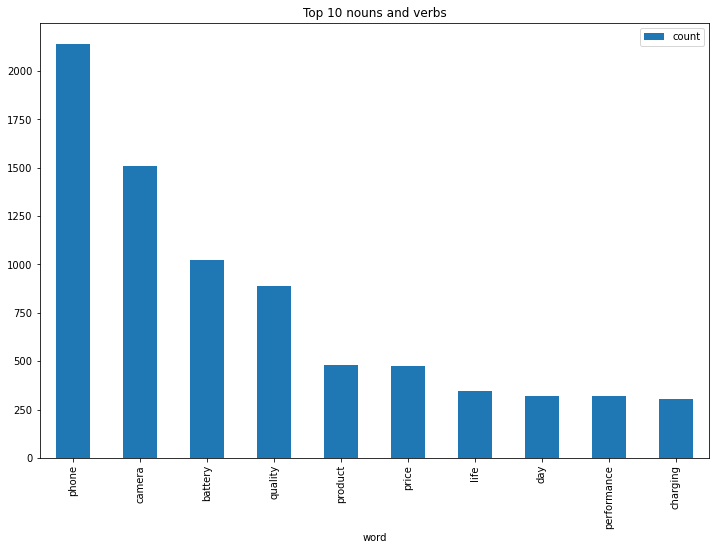

In [133]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [134]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [135]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [136]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())


Clean_Reviews
pos           4581
neg            367

In [137]:
dataframe.Clean_Reviews[8]

'overall good g phonebattery good battery back last upto half day normal use camera good want excellent camera phone personally expected brand otherwise everything like processor speed performance etc good'

In [138]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'compound': 0.9524}

In [139]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

Review  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   

                                              scores  
0  {'neg': 0.018, 'neu': 0.69, 'pos': 0.291, 'com...  
1  {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...  
2  {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...  
3  {'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...  
4  {'neg': 0.054, 'neu': 0.732, 'pos': 0.215, 'co...

In [140]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

Review  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   

                                              scores  compound  
0  {'neg': 0.018, 'neu': 0.69, 'pos': 0.291, 'com...    0.9974  
1  {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...    0.9876  
2  {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...    0.9776  
3  {'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...    0.9839  
4  {'neg': 0.054, 'neu': 0.732, 'pos': 0.215, 'co...    0.9217

In [141]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

Review  \
0     povs one plus nord ce lite phone pro using one...   
1     purchased gb version phone come extendable gb ...   
2     try keep review short review perspective avera...   
3     definitely budget branded phone month day use ...   
4     received today quality good apt gamers video w...   
...                                                 ...   
4943  price range phone awesome good like batery cha...   
4944                           bekar camera bahut bhari   
4945                             phone performance poor   
4946                                        nice mobile   
4947                                                nan   

                                                 scores  compound sentiment  
0     {'neg': 0.018, 'neu': 0.69, 'pos': 0.291, 'com...    0.9974  Positive  
1     {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...    0.9876  Positive  
2     {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...    0.9776  Positive  
3     {'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...    0.9839  Positive  
4     {'neg': 0.054, 'neu': 0.732, 'pos': 0.215, 'co...    0.9217  Positive  
...                                                 ...       ...       ...  
4943  {'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...    0.9081  Positive  
4944  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
4945  {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'comp...   -0.4767  Negative  
4946  {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...    0.4215  Positive  
4947  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  

[4948 rows x 4 columns]

In [142]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [144]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

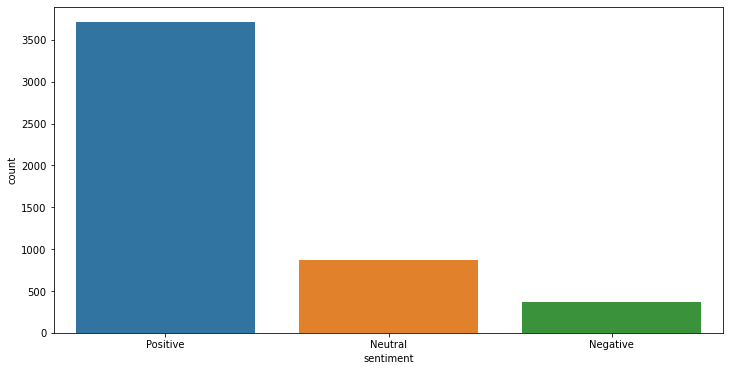

In [146]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='compound', ylabel='Density'>

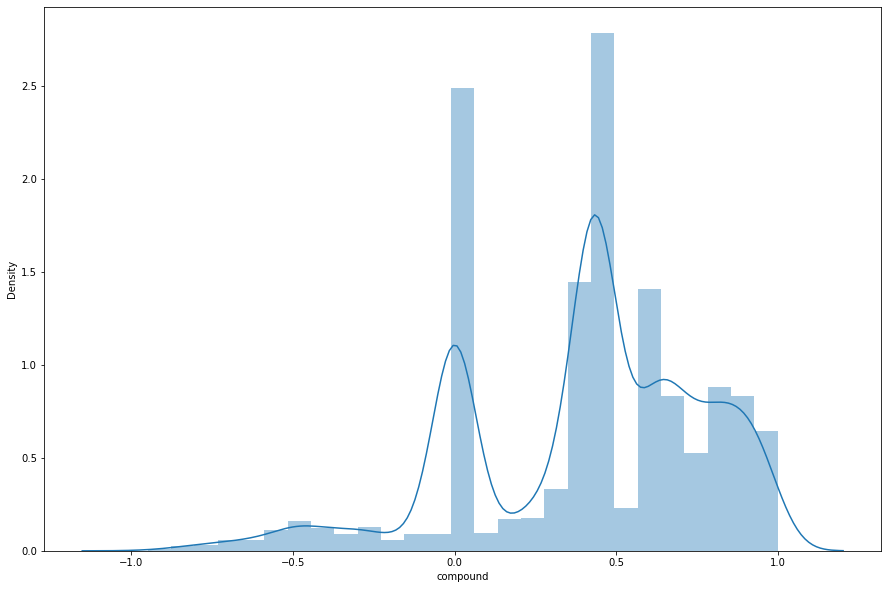

In [145]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [147]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

Review  word_count
0  povs one plus nord ce lite phone pro using one...         252
1  purchased gb version phone come extendable gb ...         165
2  try keep review short review perspective avera...         112
3  definitely budget branded phone month day use ...          73
4  received today quality good apt gamers video w...          68

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

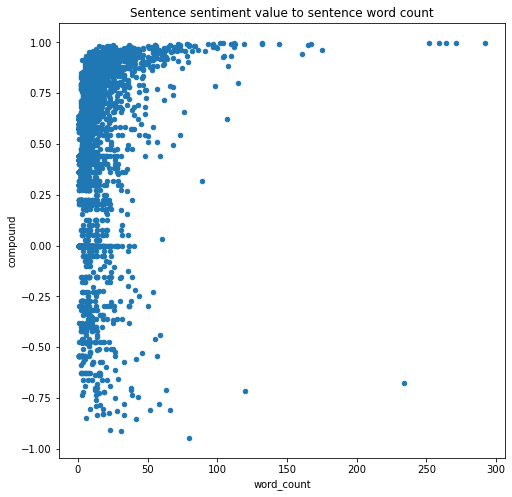

In [148]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [149]:
#Using Textblob
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

Clean_Reviews
pos           4641
neg            307

In [150]:
# let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   

                                   Uncleaned_Reviews  \
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...   
1  I've purchased the 6GB version of this phone w...   
2  I will try to keep this review short. This rev...   
3  This is definitely a budget branded phone 📱 af...   
4  I received it today. The quality is good. It's...   

                                    tokenized_tweets  Subjectivity  Polarity  
0  [povs, one, plus, nord, ce, lite, phone, pro, ...      0.587476  0.325023  
1  [purchased, gb, version, phone, come, extendab...      0.486111  0.180556  
2  [try, keep, review, short, review, perspective...      0.498519  0.169769  
3  [definitely, budget, branded, phone, month, da...      0.685863  0.219395  
4  [received, today, quality, good, apt, gamers, ...      0.471667  0.305000

Text(0, 0.5, 'Subjectivity')

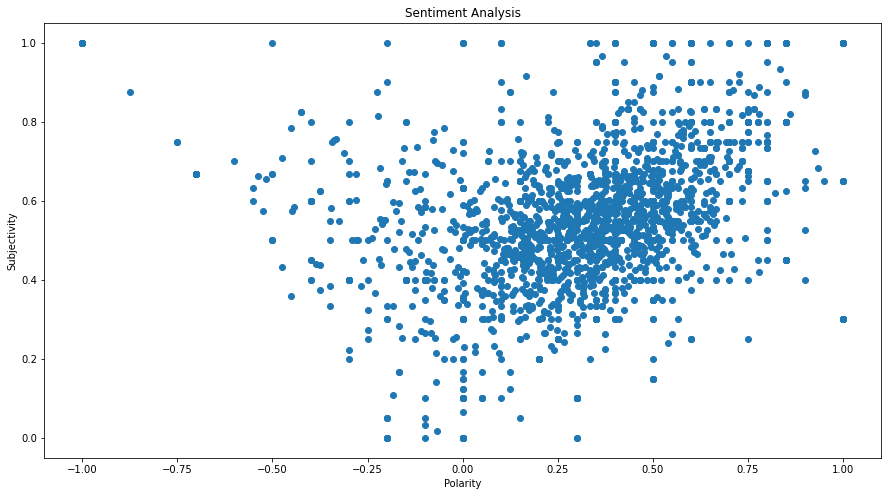

In [151]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [152]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

#### NLTK gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.

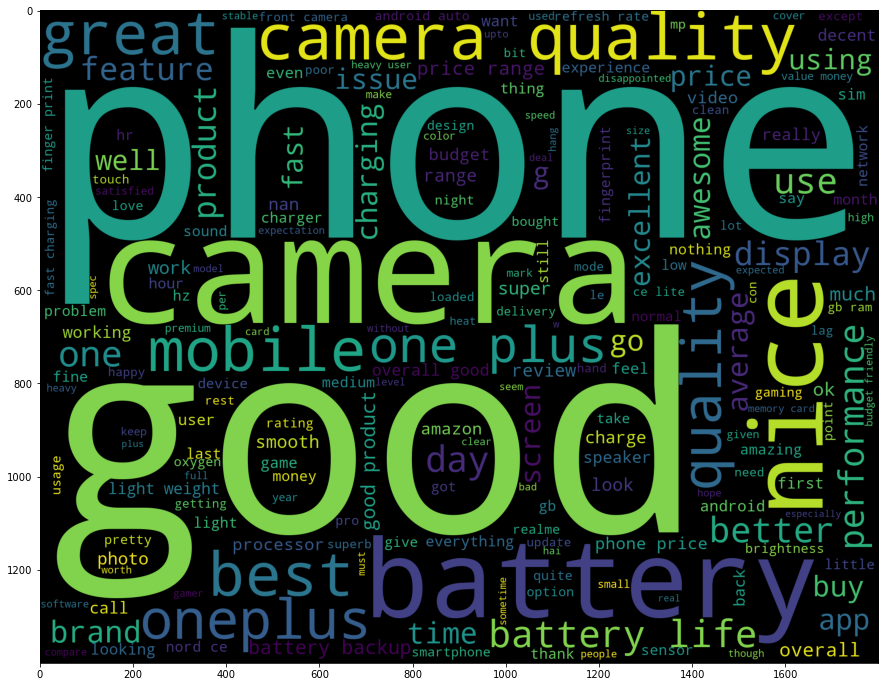

In [154]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [155]:
#Most Common Words In Positive Reviews
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

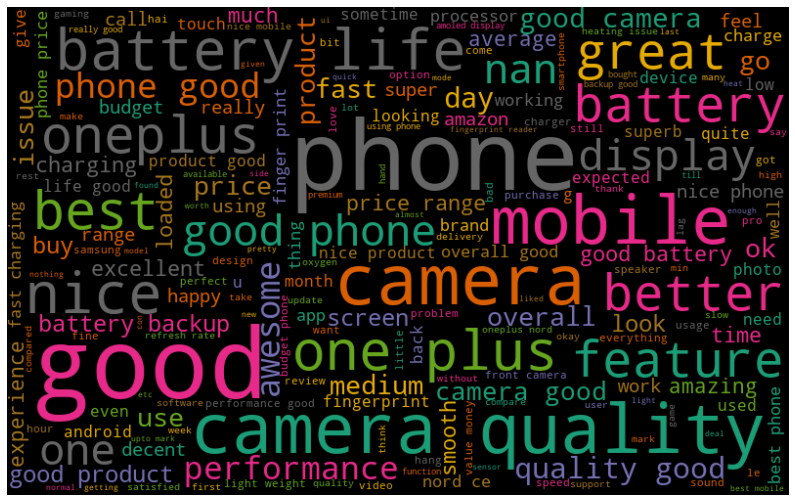

In [156]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

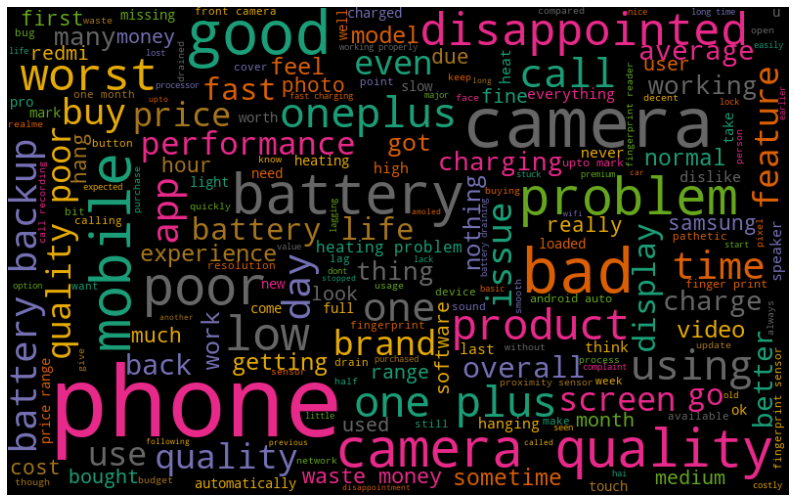

In [157]:
#Most Common Words In Negative Reviews
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)